In [1]:
import os
import streamlit as st
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.chains import create_retrieval_chain
from langchain import hub
from langchain.prompts import PromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

def initialize_rag_system(pdf_path):
    """Initialize the RAG system with a given PDF."""
    # LLM and Embedding Model
    llm = Ollama(model="mistral", base_url="http://127.0.0.1:11434")
    embed_model = OllamaEmbeddings(
        model="mistral",
        base_url='http://127.0.0.1:11434'
    )

    # Load and split PDF
    loader = PyMuPDFLoader(pdf_path)
    documents = loader.load()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=128)
    chunks = text_splitter.split_documents(documents)

    # Create vector store
    persist_directory = "persisted_db"
    os.makedirs(persist_directory, exist_ok=True)
    vector_store = Chroma.from_documents(
        chunks, embed_model, persist_directory=persist_directory
    )
    retriever = vector_store.as_retriever()

    # Create prompt template
    formatted_prompt = """
    Si une réponse peut être trouvée à partir des documents fournis, donnez-la. 
    Si aucune réponse pertinente n'est disponible dans les documents, répondez en utilisant le modèle LLM Mistral uniquement.
    Contexte: {context}
    Question: {question}
    Réponse:
    """.strip()

    prompt_template = PromptTemplate(
        input_variables=["context", "question"], 
        template=formatted_prompt
    )

    # Create retrieval chain
    combine_docs_chain = create_stuff_documents_chain(
        llm, prompt_template
    )
    retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)

    return retrieval_chain

def main():
    st.title("RAG PDF Question Answering App")

    # PDF File Uploader
    uploaded_file = st.file_uploader("Choose a PDF file", type="pdf")

    if uploaded_file is not None:
        # Save uploaded file temporarily
        with open("temp_uploaded.pdf", "wb") as f:
            f.write(uploaded_file.getbuffer())
        
        # Initialize RAG system
        try:
            retrieval_chain = initialize_rag_system("temp_uploaded.pdf")
            
            # Question input
            question = st.text_input("Enter your question:")
            
            if question:
                # Generate response
                with st.spinner('Generating response...'):
                    response = retrieval_chain.invoke({"input": "Voici le contexte des documents", "question": question})
                
                # Display response
                st.subheader("Answer:")
                st.write(response['answer'])
        
        except Exception as e:
            st.error(f"An error occurred: {e}")
        
        # Clean up temporary file
        finally:
            if os.path.exists("temp_uploaded.pdf"):
                os.remove("temp_uploaded.pdf")

if __name__ == "__main__":
    main()

2024-11-25 21:44:50.104 
  command:

    streamlit run c:\Users\pc\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## Résultat :

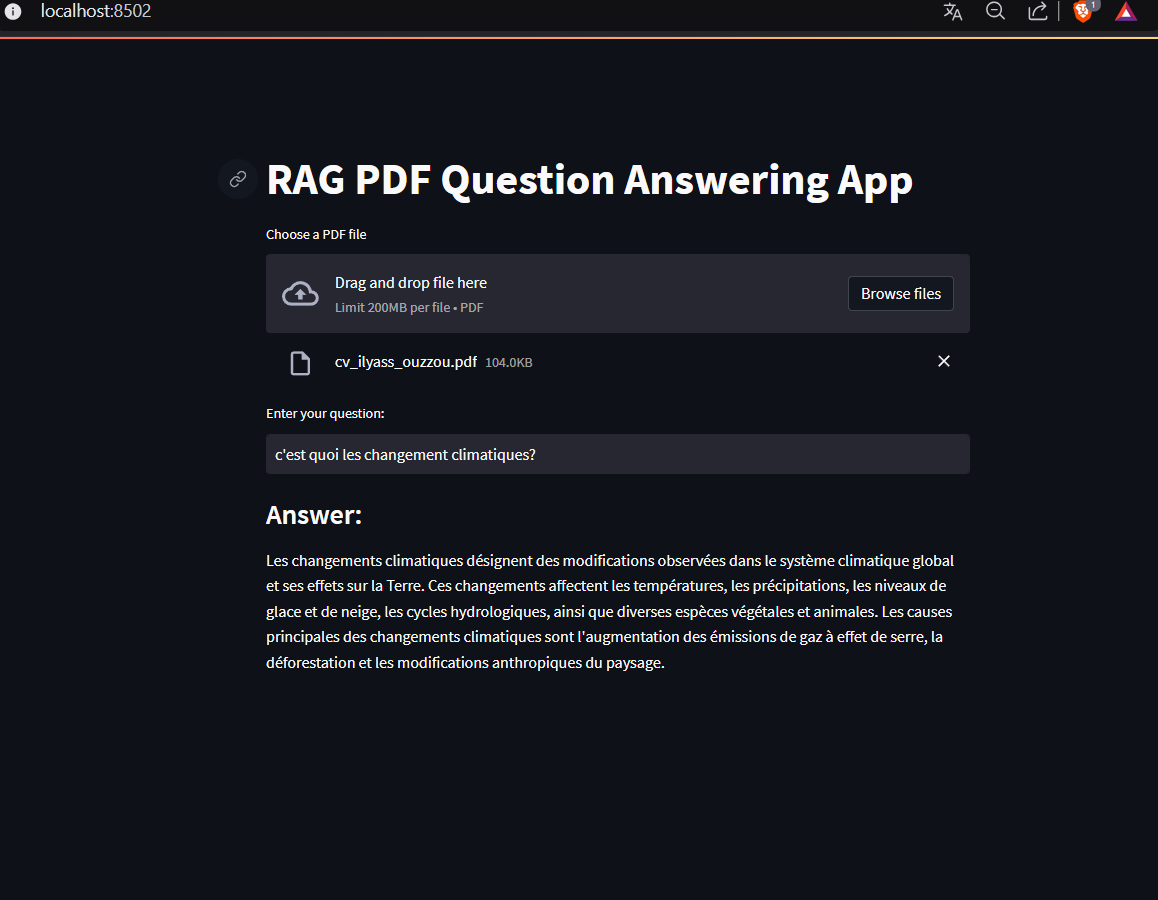

In [2]:
from IPython.display import Image, display

# Replace 'path_to_image.jpg' with the path to your image file
image_path = "Capture d'écran 2024-11-25 214724.png"
display(Image(filename=image_path))